In [0]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

device=torch.device('cuda:0')

In [0]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((8,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X=X.T

W=np.zeros((8,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W=W.T

# Shallow NN for classification, no pretraining, nonlinear hidden units

In [17]:
# Sparse Coding Adam, nonlinearity

lr=0.001
Y=torch.tensor([[1,1,1,1,0,0,0,0], 
                [0,0,0,0,1,1,1,1]], 
               dtype=torch.float, requires_grad=False, device=device)
x=torch.tensor(X, dtype=torch.float, requires_grad=False, device=device)
We=torch.randn((8,21*21), dtype=torch.float, requires_grad=True, device=device)
be=torch.randn((8,1), dtype=torch.float, requires_grad=True, device=device)
W2=torch.randn((2,8), dtype=torch.float, requires_grad=True, device=device)
b2=torch.randn((2,1), dtype=torch.float, requires_grad=True, device=device)

We.data*=.001
be.data*=.001
W2.data*=.001
b2.data*=.001

maxIter=1000
errt=np.zeros(maxIter, dtype=np.float32)

selu=torch.nn.SELU()

optimizer = torch.optim.Adam([We, W2, be, b2], betas=[0.9, 0.999], lr=lr)

for i in range(maxIter):
    Yh=W2@selu(We@x+be)+b2
    err=torch.sum(-Y*torch.log(torch.exp(Yh)/torch.sum(torch.exp(Yh), dim=0, keepdim=True)))
    errt[i]=err.detach()
    
    optimizer.zero_grad()   
    err.backward()    
    optimizer.step()

    
print(torch.exp(Yh)/torch.sum(torch.exp(Yh), dim=0, keepdim=True))    
print(Y)    


tensor([[9.9901e-01, 9.9901e-01, 9.9901e-01, 9.9901e-01, 1.1125e-03, 1.1130e-03,
         1.1125e-03, 1.1125e-03],
        [9.9355e-04, 9.9326e-04, 9.9353e-04, 9.9352e-04, 9.9889e-01, 9.9889e-01,
         9.9889e-01, 9.9889e-01]], device='cuda:0', grad_fn=<DivBackward0>)
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1.]], device='cuda:0')


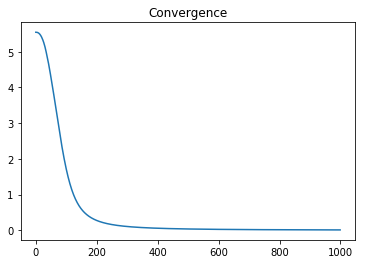

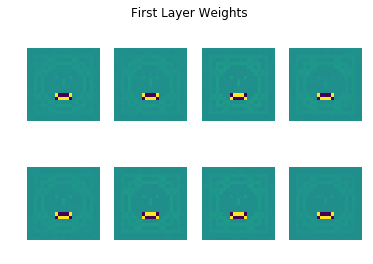

In [18]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')

plt.figure()
plt.suptitle('First Layer Weights')    
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(We.detach().to("cpu")[i*4+j,:].resize_((21,21)))
    plt.axis('off')

